In [ ]:
import pandas as pd
import gdown

file_id = "1wmb3I3ADd9DQYitVzbcXiCwBZDE5C_3i"
url = f"https://drive.google.com/uc?id={file_id}"
output = "creditcard.csv"  
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1wmb3I3ADd9DQYitVzbcXiCwBZDE5C_3i
From (redirected): https://drive.google.com/uc?id=1wmb3I3ADd9DQYitVzbcXiCwBZDE5C_3i&confirm=t&uuid=35a29432-980a-4160-9e04-2b1c8ff8d02c
To: d:\Project\Fraud_CreditCard_detection_DSTree\creditcard.csv
100%|██████████| 151M/151M [00:12<00:00, 12.1MB/s] 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# fraud --> false
is_fraud = df[df['Class']==0]
not_fraud = df[df['Class']==1]
print(f'numbers of fraud credit card: {len(not_fraud)}')
print(f'numbers of normal card: {len(is_fraud)}')

numbers of fraud credit card: 492
numbers of normal card: 284315


In [4]:
x_data = df.drop('Class', axis=1)
y_data = df['Class']

print(x_data.head(), y_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [5]:
print(f'x_data.shape: {x_data.shape}',
      f'y_data.shape: {y_data.shape}', sep='\n')

x_data.shape: (284807, 30)
y_data.shape: (284807,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59


In [7]:
y_test.shape

(56962,)

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)

In [9]:
Y_pred.shape

(56962,)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

matrix = confusion_matrix(y_test, Y_pred)
matrix

array([[56832,    32],
       [   19,    79]], dtype=int64)

In [11]:
print(f'accuracy score: {accuracy_score(y_test, Y_pred)*100}',
      f'precision: {precision_score(y_test, Y_pred, pos_label=1)*100}',
      f'recall: {recall_score(y_test, Y_pred, pos_label=1)*100}',
      f'f1 score: {f1_score(y_test, Y_pred, pos_label=1)*100}',
      sep='\n')

accuracy score: 99.91046662687407
precision: 71.17117117117117
recall: 80.61224489795919
f1 score: 75.5980861244019


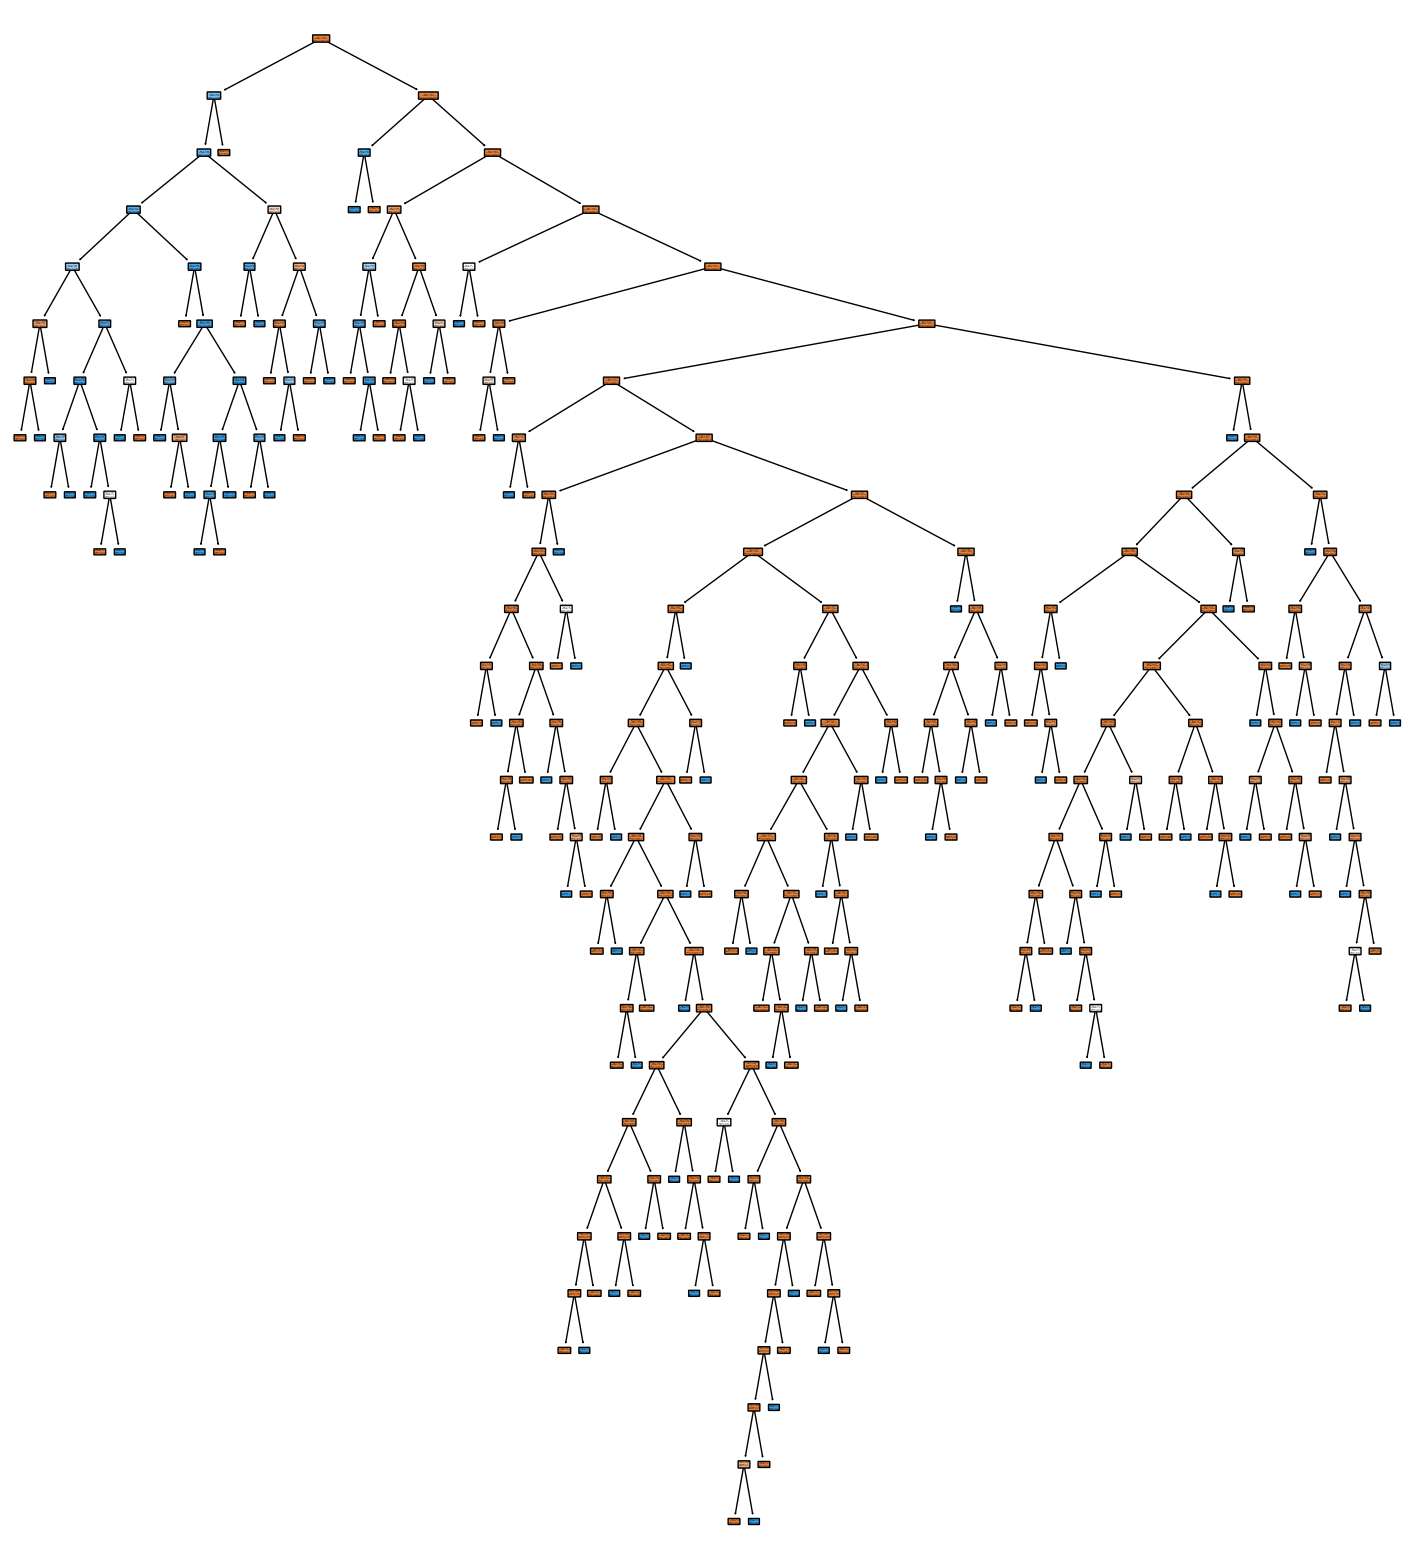

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature = ['Time']
for i in range(1, 29):
    feature.append(f'V{i}')
feature.append('Amount')
plt.figure(figsize=(18, 20))
plot_tree(classifier,feature_names=feature, class_names = ['Normal', 'Fraud'], filled=True, rounded=True)
plt.show()

In [13]:
import dtreeviz
viz_model = dtreeviz.model(classifier,
                           X_train = x_train,
                            y_train = y_train,
                            feature_names  = feature,
                             target_name = 'Class' )

In [14]:
run = viz_model.view()
run.save('CreditCards.svg')

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
